# **Práctica 8: Árboles. Parte 1**

## **Nodos y Árbol**

In [15]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Tree:
    def __init__(self):
        self.root = None
    
    def balanced_insertion(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return
        
        queue = []
        queue.append(self.root)

        while True:
            father = queue[0]
            if father.left is None:
                father.left = new_node
                return
            elif father.right is None:
                father.right = new_node
                queue.pop(0)
                return
            else:
                queue.append(father.left)
                queue.append(father.right)
                queue.pop(0)

    def unbalanced_right_insertion(self, value):
        time, space = 0, 0
        time += 1
        space += 1
        new_node = Node(value)
        if self.root is None:
            space += 1
            self.root = new_node
            return time, space
        
        max_node, time_m, space_m = self.max(self.root)
        max_node.right = new_node
        return time + time_m, space + space_m

    def search(self, value):
        time, space = 0, 0
        if self.root is None:
            time += 1
            return None, time, space
        
        queue = []
        queue.append(self.root)
        space += 1

        while queue:
            time += 1
            node = queue.pop(0)
            if node.value == value:
                return node, time, space
            if node.left is not None:
                queue.append(node.left)
                space += 1
            if node.right is not None:
                queue.append(node.right)
                space += 1
        return None, time, space

    def min(self, node):
        time, space = 1, 1
        current = node
        while current.left is not None:
            time += 1
            current = current.left
        return current, time, space
    
    def max(self, node):
        time, space = 1, 1
        current = node
        while current.right is not None:
            time += 1
            current = current.right
        return current, time, space

    def preorder(self, node, time, space):
        if node is not None:
            time += 1
            space += 1
            left_values, time, space = self.preorder(node.left, time, space)
            right_values, time, space = self.preorder(node.right, time, space)
            return [node.value] + left_values + right_values, time, space
        return [], time, space

    def inorder(self, node, time, space):
        if node is not None:
            time += 1
            space += 1
            left_values, time, space = self.inorder(node.left, time, space)
            right_values, time, space = self.inorder(node.right, time, space)
            return left_values + [node.value] + right_values, time, space
        return [], time, space

    def postorder(self, node, time, space):
        if node is not None:
            time += 1
            space += 1
            left_values, time, space = self.postorder(node.left, time, space)
            right_values, time, space = self.postorder(node.right, time, space)
            return left_values + right_values + [node.value], time, space
        return [], time, space
    
    def delete(self, value):
        time, space = 0, 0
        if self.root is None:
            return time, space
        
        queue = []
        queue.append(self.root)
        node_to_delete = None
        last_node = None
        parent_of_last = None

        while queue:
            time += 1
            node = queue.pop(0)
            if node.value == value:
                node_to_delete = node
            if node.left is not None:
                parent_of_last = node
                last_node = node.left
                queue.append(node.left)
                space += 1
            if node.right is not None:
                parent_of_last = node
                last_node = node.right
                queue.append(node.right)
                space += 1
        
        if node_to_delete is not None:
            node_to_delete.value = last_node.value
            if parent_of_last.right == last_node:
                parent_of_last.right = None
            else:
                parent_of_last.left = None
        return time, space

    def print(self, node, prefix, is_left):
        if node is not None:
                print(prefix + ("├── " if is_left else "└── ") + str(node.value))
                prefix_son = prefix + ("│   " if is_left else "    ")
                self.print(node.left, prefix_son, True)
                self.print(node.right, prefix_son, False)

## **Pruebas**

In [12]:
# - - - - - - Creación - - - - - -

myTree = Tree()

for i in range(10):
    myTree.balanced_insertion(i)

print("Tree:")
myTree.print(myTree.root, "", True)
print()

# - - - - - - Búsqueda - - - - - -
node_search = 5
result = myTree.search(node_search)
print("El Nodo", node_search, "Fue Encontrado\n" if result else "No Fue Encontrado\n")

# - - - - - - Eliminar - - - - - -
print("Eliminar", node_search)
myTree.delete(node_search)
myTree.print(myTree.root, "", True)
print()

# - - - - - - Mínimo y Máximo - - - - - -

min_node, time, space = myTree.min(myTree.root)
print("Min:", min_node.value if min_node else "Arbol vacío")
max_node, time, space = myTree.max(myTree.root)
print("Max:", max_node.value if max_node else "Arbol vacío")
print()

# - - - - - - Recorridos - - - - - -
pre, time, space = myTree.preorder(myTree.root, 0, 0)
inor, time, space = myTree.inorder(myTree.root, 0, 0)
post, time, space = myTree.postorder(myTree.root, 0, 0)
print("Preorder Traversal:", pre)
print("Inorder Traversal:", inor)
print("Postorder Traversal:", post)


Tree:
├── 0
│   ├── 1
│   │   ├── 3
│   │   │   ├── 7
│   │   │   └── 8
│   │   └── 4
│   │       ├── 9
│   └── 2
│       ├── 5
│       └── 6

El Nodo 5 Fue Encontrado

Eliminar 5
├── 0
│   ├── 1
│   │   ├── 3
│   │   │   ├── 7
│   │   │   └── 8
│   │   └── 4
│   └── 2
│       ├── 9
│       └── 6

Min: 7
Max: 6

Preorder Traversal: [0, 1, 3, 7, 8, 4, 2, 9, 6]
Inorder Traversal: [7, 3, 8, 1, 4, 0, 9, 2, 6]
Postorder Traversal: [7, 8, 3, 4, 1, 9, 6, 2, 0]


## **Peores Casos**

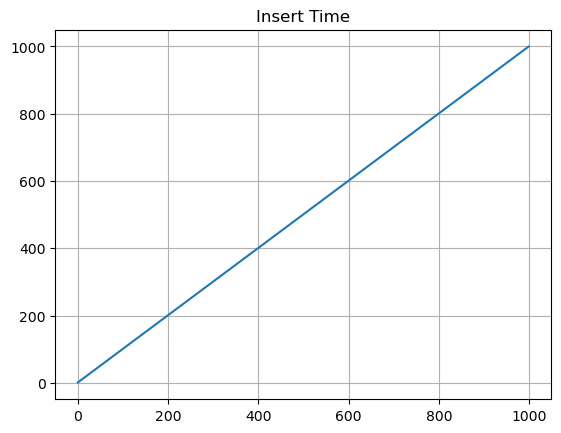

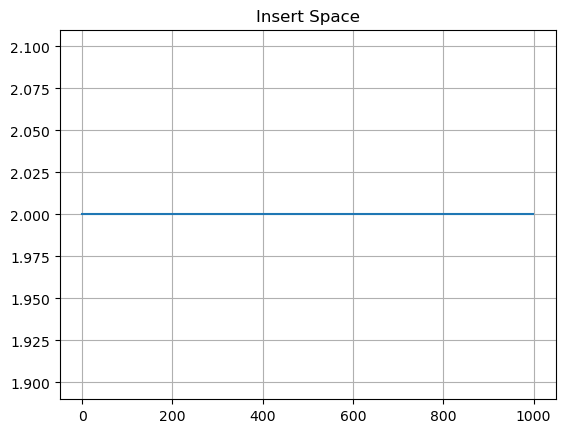

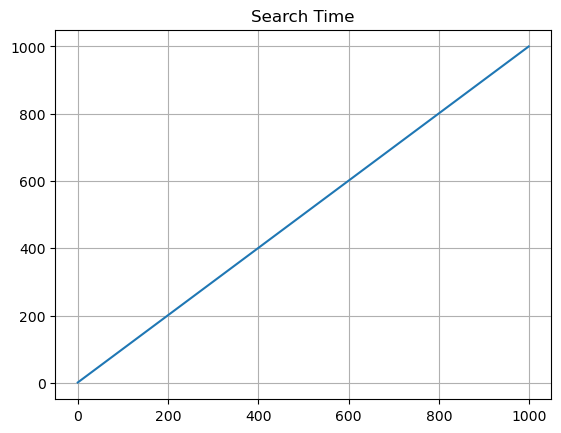

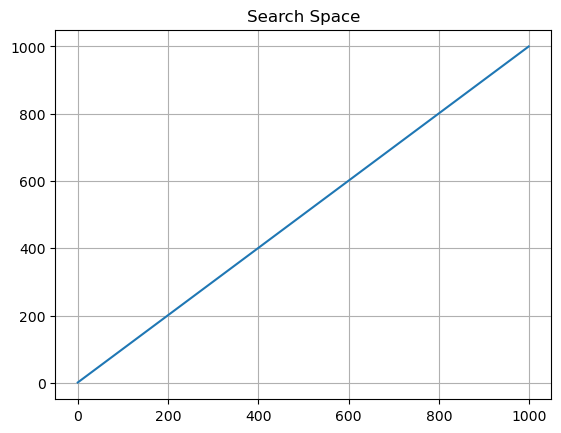

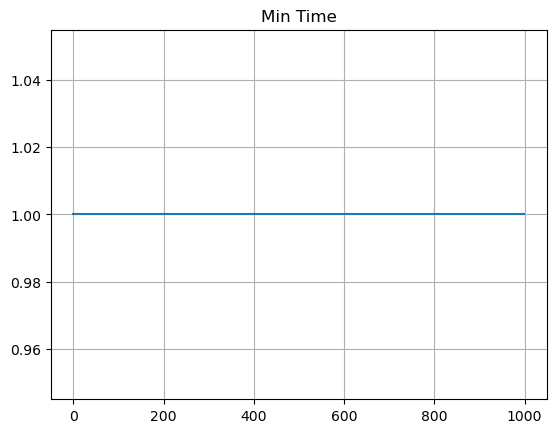

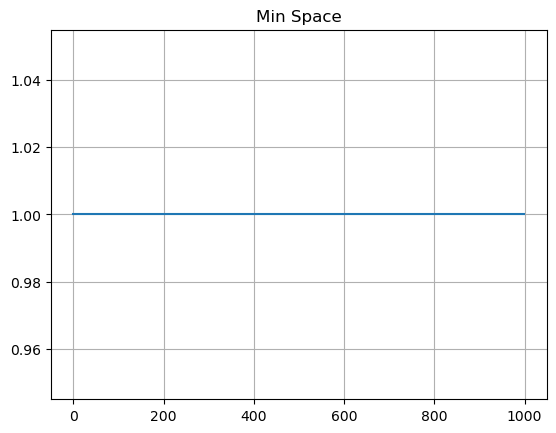

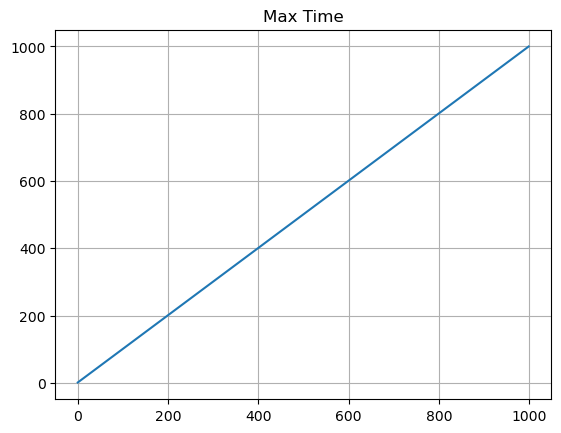

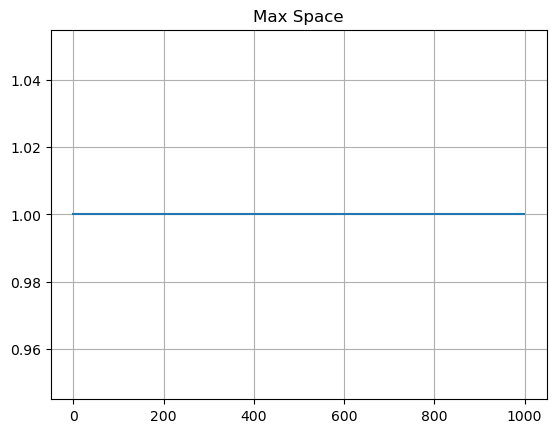

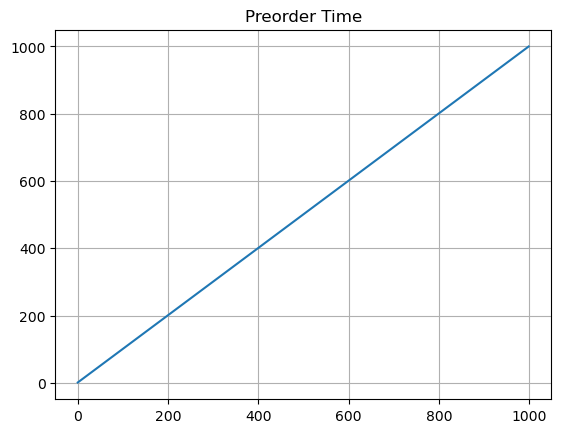

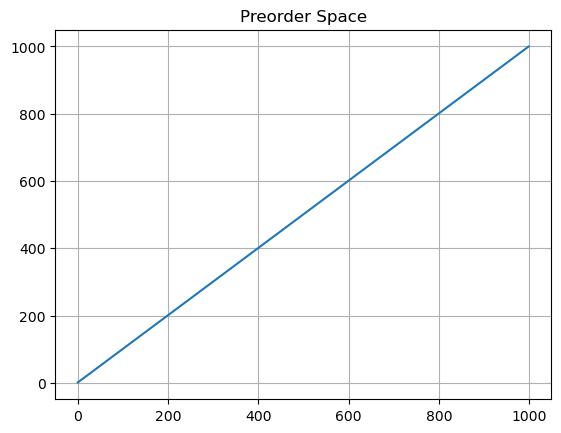

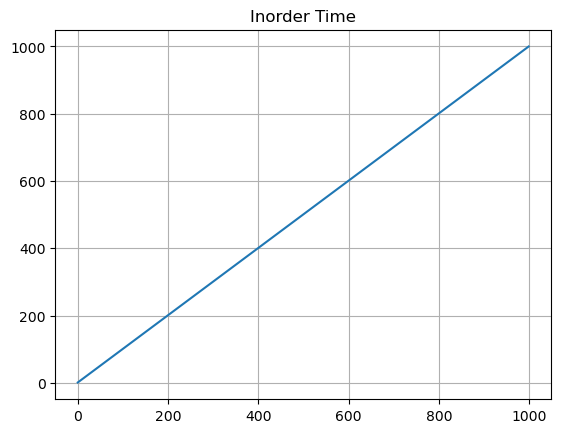

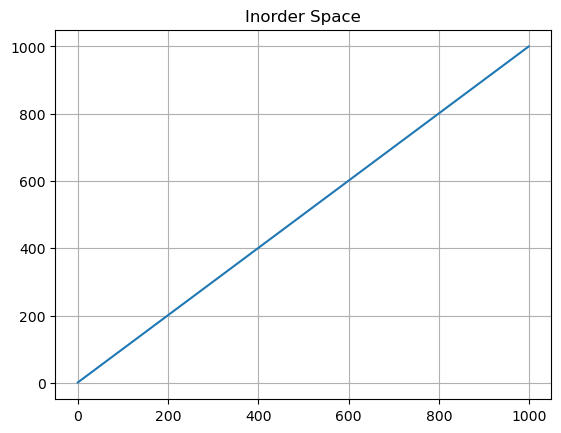

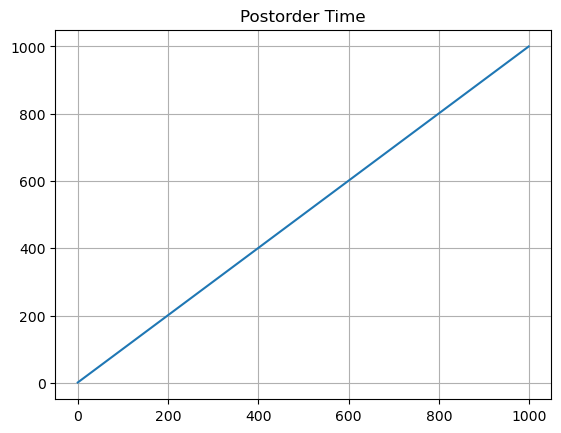

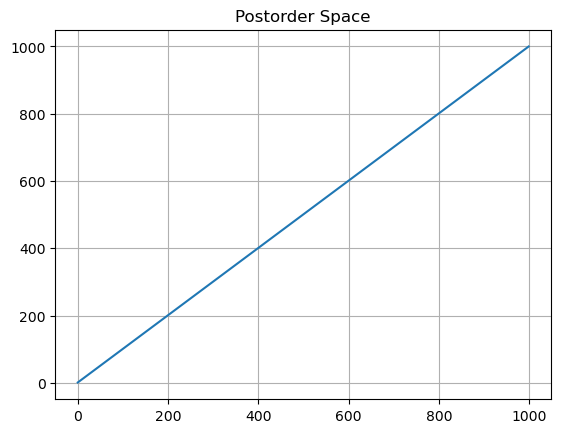

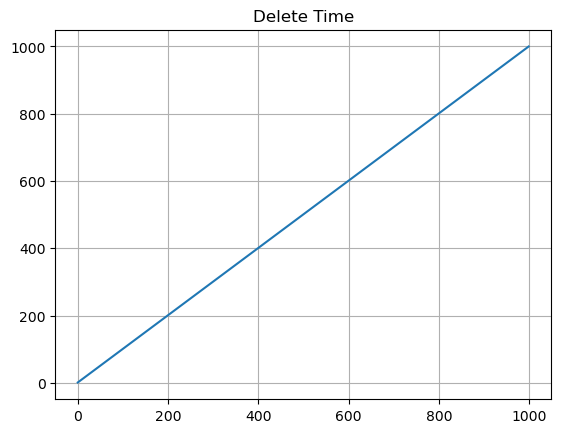

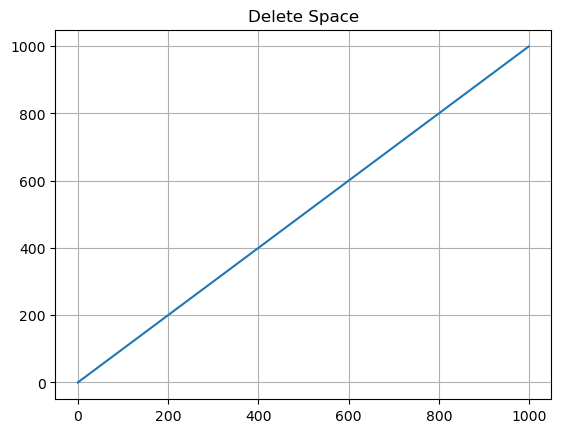

In [30]:
MAX = 1000
myTree = Tree()
x = list(range(MAX))

y = []

for i in range(MAX):
    time, space = myTree.unbalanced_right_insertion(i) # time, space
    y.append(time)
    y.append(space)
    node, time, space = myTree.search(i) # node, time, space
    y.append(time)
    y.append(space)
    node, time, space = myTree.min(myTree.root) # node, time, space
    y.append(time)
    y.append(space)
    node, time, space = myTree.max(myTree.root) # node, time, space
    y.append(time)
    y.append(space)
    arr, time, space = myTree.preorder(myTree.root, 0, 0) # arr nodes, time, space
    y.append(time)
    y.append(space)
    arr, time, space = myTree.inorder(myTree.root, 0, 0) # arr nodes, time, space
    y.append(time)
    y.append(space)
    arr, time, space = myTree.postorder(myTree.root, 0, 0) # arr nodes, time, space
    y.append(time)
    y.append(space)
    y.append(0)
    y.append(0)

for i in range(14, MAX * 16, 16):
    j = 0
    myTree = Tree()
    while j < i:
        time, space = myTree.unbalanced_right_insertion(j)
        j += 16

    time, space = myTree.delete(j) # time, space
    y[i] = time
    y[i + 1] = space

methods = ["Insert Time", "Insert Space", "Search Time", "Search Space", "Min Time", "Min Space", "Max Time", "Max Space", "Preorder Time", "Preorder Space", "Inorder Time", "Inorder Space", "Postorder Time", "Postorder Space", "Delete Time", "Delete Space"]

for j in range(0, len(methods), 2):
    time = []
    space = []

    i = j
    while i < MAX * 16:
        time.append(y[i])
        space.append(y[i + 1])
        i += 16

    plt.title(methods[j])
    plt.plot(x, time)
    plt.grid(1)
    plt.show()

    plt.title(methods[j + 1])
    plt.plot(x, space)
    plt.grid(1)
    plt.show()